# Steel temperature


## Contents:

<a href="#step_1">1. Data preparation</a>

<a href="#substep_1" style="margin-left: 20px;" >1.1. Load data</a>

<a href="#substep_2" style="margin-left: 20px;">1.2. Rename columns</a>

<a href="#substep_3" style="margin-left: 20px;">1.3. Change data type</a>

<a href="#substep_4" style="margin-left: 20px;">1.4. Analyze missing values</a>

<a href="#substep_5" style="margin-left: 20px;">1.5. Calculate new features</a>

<a href="#substep_6" style="margin-left: 20px;">1.6. Analyze outliers</a>

<a href="#step_2">2. Final datasets</a>

<a href="#substep_7" style="margin-left: 20px;">2.1. Build tables</a>

<a href="#substep_8" style="margin-left: 20px;">2.2. Extract features and target</a>

<a href="#substep_9" style="margin-left: 20px;">2.3. Split dataset to train and test</a>

<a href="#step_3">3. Modelling</a>

<a href="#substep_10" style="margin-left: 20px;">3.1. Linear regression</a>

<a href="#substep_11" style="margin-left: 20px;">3.2. Decision tree</a>

<a href="#substep_12" style="margin-left: 20px;">3.3. Random forest</a>

<a href="#substep_13" style="margin-left: 20px;">3.4. Model test</a>

<a href="#step_4">4. Conclusion</a>

<h2><a id="step_1" style="color: black; text-decoration: none;">1. Data preparation</a></h2>

Import all the necessary libraries

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

<h3><a id="substep_1" style="color: black; text-decoration: none;">1.1. Load data</a></h3>

In [2]:
#load data & look at 5 first values & look at basic info
electrods = pd.read_csv('/datasets/final_steel/data_arc.csv')
bulk_volume = pd.read_csv('/datasets/final_steel/data_bulk.csv')
bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
temperature = pd.read_csv('/datasets/final_steel/data_temp.csv')
wire_volume = pd.read_csv('/datasets/final_steel/data_wire.csv')
wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

dfs = [electrods, bulk_volume, bulk_time, gas, temperature, wire_volume, wire_time]

for df in dfs:
    print(df.info())
    print('')
    print(df.head(5))
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None

   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.744363   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           1.659363   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.692755   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805  
3             1.062669  
4             0.414397  

<class 'panda

<h3><a id="substep_2" style="color: black; text-decoration: none;">1.2. Rename columns</a></h3>

Rename all columns to small latin letters

In [3]:
#rename columns
electrods = electrods.rename(columns = {'key': 'key', 'Начало нагрева дугой': 'start', \
                              'Конец нагрева дугой': 'finish', 'Активная мощность': 'active', \
                              'Реактивная мощность': 'reactive'})

bulk_volume = bulk_volume.rename(columns = {'key': 'key', 'Bulk 1': 'bulk_1', 'Bulk 2': 'bulk_2', \
                              'Bulk 3': 'bulk_3', 'Bulk 4': 'bulk_4', 'Bulk 5': 'bulk_5',\
                                  'Bulk 6': 'bulk_6', 'Bulk 7': 'bulk_7', 'Bulk 8': 'bulk_8',\
                                  'Bulk 9': 'bulk_9', 'Bulk 10': 'bulk_10', 'Bulk 11': 'bulk_11',\
                                 'Bulk 12': 'bulk_12', 'Bulk 13': 'bulk_13', 'Bulk 14': 'bulk_14',\
                                 'Bulk 15': 'bulk_15'})

bulk_time = bulk_time.rename(columns = {'key': 'key', 'Bulk 1': 'bulk_1', 'Bulk 2': 'bulk_2', \
                              'Bulk 3': 'bulk_3', 'Bulk 4': 'bulk_4', 'Bulk 5': 'bulk_5',\
                                  'Bulk 6': 'bulk_6', 'Bulk 7': 'bulk_7', 'Bulk 8': 'bulk_8',\
                                  'Bulk 9': 'bulk_9', 'Bulk 10': 'bulk_10', 'Bulk 11': 'bulk_11',\
                                 'Bulk 12': 'bulk_12', 'Bulk 13': 'bulk_13', 'Bulk 14': 'bulk_14',\
                                 'Bulk 15': 'bulk_15'})

gas = gas.rename(columns = {'key': 'key', 'Газ 1': 'gas'})

temperature = temperature.rename(columns = {'key': 'key', 'Время замера': 'time_temp', \
                                            'Температура': 'temp'})

wire_volume = wire_volume.rename(columns = {'key': 'key', 'Wire 1': 'wire_1', 'Wire 2': 'wire_2', \
                              'Wire 3': 'wire_3', 'Wire 4': 'wire_4', 'Wire 5': 'wire_5',\
                                  'Wire 6': 'wire_6', 'Wire 7': 'wire_7', 'Wire 8': 'wire_8',\
                                  'Wire 9': 'wire_9'})

wire_time = wire_time.rename(columns = {'key': 'key', 'Wire 1': 'wire_1', 'Wire 2': 'wire_2', \
                              'Wire 3': 'wire_3', 'Wire 4': 'wire_4', 'Wire 5': 'wire_5',\
                                  'Wire 6': 'wire_6', 'Wire 7': 'wire_7', 'Wire 8': 'wire_8',\
                                  'Wire 9': 'wire_9'})

<h3><a id="substep3" style="color: black; text-decoration: none;">1.3. Change data type</a></h3>

To be properly used some features need to have "date" types:
- from table `electrods`: `start`, `finish`
- from table `temperature`: `time_temp`
- from table `bulk_time`: `bulk_1` to `bulk_15`
- from table `wire_time`: `wire_1` to `wire_9`

In [4]:
#change data type to date
electrods.start = pd.to_datetime(electrods.start, format = '%Y-%m-%d %H:%M:%S')
electrods.finish = pd.to_datetime(electrods.finish, format = '%Y-%m-%d %H:%M:%S')
temperature.time_temp = pd.to_datetime(temperature.time_temp, format = '%Y-%m-%d %H:%M:%S')
    
    
bulk_names = ['bulk_' + str(x) for x in range(1,16)]
wire_names = ['wire_' + str(x) for x in range(1,10)]

for name in bulk_names:
    bulk_time[name] = pd.to_datetime(bulk_time[name], format = '%Y-%m-%d %H:%M:%S')
    
for name in wire_names:
    wire_time[name] = pd.to_datetime(wire_time[name], format = '%Y-%m-%d %H:%M:%S')

<h3><a id="substep_4" style="color: black; text-decoration: none;">1.4. Analyze missing values</a></h3>

There are missing values in tables `bulk_volume`, `bulk_time`, `temperature`, `wire_volume` and `wire_time`.

We need to check that missing values in `temperature` occur because of technical errors then we can drop them.

Missing values in tables `bulk_volume`, `bulk_time`, `wire_volume` and `wire_time` mean than no materials were added. That's why we can fill them in:
- volume = 0
- date as a min by key

In [5]:
#check null values in temperature
table = pd.pivot_table(temperature, values = 'temp', index = 'key', aggfunc='count')
print(table[table['temp'] == 1])
print()
print(temperature[temperature['key'].isin(table[table['temp'] == 1].index)])

      temp
key       
195      1
279      1
2500     1
2501     1
2502     1
...    ...
3237     1
3238     1
3239     1
3240     1
3241     1

[741 rows x 1 columns]

        key           time_temp    temp
1100    195 2019-05-10 14:10:23  1583.0
1554    279 2019-05-13 23:07:28  1603.0
12267  2500 2019-08-06 03:11:31  1539.0
12268  2500 2019-08-06 03:24:43     NaN
12269  2500 2019-08-06 03:25:16     NaN
...     ...                 ...     ...
15902  3241 2019-09-01 04:03:30  1586.0
15903  3241 2019-09-01 04:16:12     NaN
15904  3241 2019-09-01 04:22:39     NaN
15905  3241 2019-09-01 04:33:42     NaN
15906  3241 2019-09-01 04:38:08     NaN

[3642 rows x 3 columns]


Missing values can contain first or last, that's why do not delete them

In [6]:
#fill in null values in bulk_volume and wire_volume
bulk_volume = bulk_volume.fillna(0)
wire_volume = wire_volume.fillna(0)

In [7]:
#fill in null values in bulk_time and wire_time
bulk_time = bulk_time[bulk_names].apply(lambda x: x.fillna(value = \
                                                           bulk_time[bulk_names].min(axis = 1)))
wire_time = wire_time[wire_names].apply(lambda x: x.fillna(value = \
                                                           wire_time[wire_names].min(axis = 1)))

<h3><a id="substep_5" style="color: black; text-decoration: none;">1.5. Calculate new features</a></h3>

To perform analysis we can add new features:

1) from table `temperature`:
- first temperature
- last temperature
- duration of process (time difference between first and last temperatures)

2) from table `electrods`:
- duration of heat
- ratio of active and reactive forces

In [8]:
#first and last temperature & duration
time_first = []
time_last = []
temp_first = []
temp_last = []


for i in temperature.key.unique():
    time_min = temperature[temperature['key'] == i]['time_temp'].min()
    temp_min = temperature[(temperature['key'] == i) & (temperature['time_temp'] == time_min)]['temp'].values
    time_max = temperature[temperature['key'] == i]['time_temp'].max()
    temp_max = temperature[(temperature['key'] == i) &  (temperature['time_temp'] == time_max)]['temp'].values
    
    time_first.append(time_min)
    time_last.append(time_max)
    temp_first.append(temp_min)
    temp_last.append(temp_max)
    
    
temperature_new = pd.DataFrame(data = {'key': temperature.key.unique(), 'temp_first': temp_first, \
                                      'temp_last': temp_last, 'time_first': time_first, \
                                      'time_last': time_last})

temperature_new.temp_first = temperature_new.temp_first.astype('float')
temperature_new.temp_last = temperature_new.temp_last.astype('float')

temperature_new['duration'] = temperature_new['time_last'] - temperature_new['time_first']

temperature_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 6 columns):
key           3216 non-null int64
temp_first    3216 non-null float64
temp_last     2477 non-null float64
time_first    3216 non-null datetime64[ns]
time_last     3216 non-null datetime64[ns]
duration      3216 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 150.9 KB


There are 739 missing values of target - last temperature. As it is the most important factor for estimation, drop them

In [9]:
#drop null values
temperature_new = temperature_new.dropna()
temperature_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 6 columns):
key           2477 non-null int64
temp_first    2477 non-null float64
temp_last     2477 non-null float64
time_first    2477 non-null datetime64[ns]
time_last     2477 non-null datetime64[ns]
duration      2477 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 135.5 KB


In [10]:
#count heat duration & active/reactive relation
heat_duration = []
active_reactive = []
electrods['heat_duration'] = electrods.finish - electrods.start
electrods['active_reactive'] = electrods.active / electrods.reactive
for i in electrods.key.unique():
    duration = electrods[electrods.key == i]['heat_duration'].sum()
    relation = electrods[electrods.key == i]['active_reactive'].mean()
    heat_duration.append(duration)
    active_reactive.append(relation)

electrods_new = pd.DataFrame(data = {'key': electrods.key.unique(), 'heat_duration': heat_duration, \
                                      'active_reactive': active_reactive})
electrods_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 3 columns):
key                3214 non-null int64
heat_duration      3214 non-null timedelta64[ns]
active_reactive    3214 non-null float64
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 75.5 KB


<h3><a id="substep_6" style="color: black; text-decoration: none;">1.6. Analyze outliers</a></h3>

Look at distribution of the following features:

1) from table `temperature`:
- first temperature
- last temperature
- duration of process (time difference between first and last temperatures)

2) from table `electrods`:
- duration of heat
- ratio of active and reactive forces

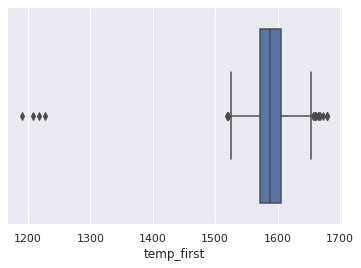

In [11]:
#distribution of first temperature
sns.boxplot(temperature_new['temp_first'])
plt.show()

In [12]:
#statistics of first temperature
temperature_new['temp_first'].describe()

count    2477.000000
mean     1588.405733
std        29.232904
min      1191.000000
25%      1572.000000
50%      1588.000000
75%      1605.000000
max      1679.000000
Name: temp_first, dtype: float64

Minimum temperature to melt steel is 1450', so we can drop all the values below that

In [13]:
temperature_new = temperature_new[temperature_new['temp_first'] > 1300]
temperature_new['temp_first'].describe()

count    2473.000000
mean     1589.016175
std        24.996127
min      1519.000000
25%      1572.000000
50%      1588.000000
75%      1605.000000
max      1679.000000
Name: temp_first, dtype: float64

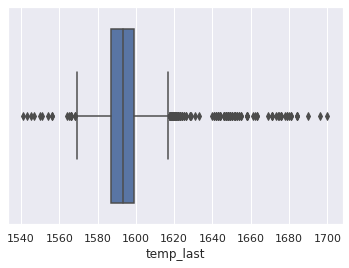

In [14]:
#distribution of last temperature
sns.boxplot(temperature_new['temp_last'])
plt.show()

In [15]:
#statistics of last temperature
temperature_new['temp_last'].describe()

count    2473.000000
mean     1595.338051
std        16.031388
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1599.000000
max      1700.000000
Name: temp_last, dtype: float64

In [16]:
#statistics of duration
temperature_new['duration'].describe()

count                      2473
mean     0 days 00:30:53.312980
std      0 days 00:21:42.646929
min             0 days 00:00:00
25%             0 days 00:19:41
50%             0 days 00:26:30
75%             0 days 00:37:42
max             0 days 06:32:17
Name: duration, dtype: object

In [17]:
#look at zero values
temperature_new[temperature_new['duration'] == '0 days 00:00:00']

,key,temp_first,temp_last,time_first,time_last,duration
192,195,1583.0,1583.0,2019-05-10 14:10:23,2019-05-10 14:10:23,0 days
276,279,1603.0,1603.0,2019-05-13 23:07:28,2019-05-13 23:07:28,0 days


In [18]:
#drop zero values
temperature_new = temperature_new[temperature_new['duration'] > '0 days 00:00:00'].copy()

In [19]:
#statistics of heat duration
electrods_new['heat_duration'].describe()

count                      3214
mean     0 days 00:13:14.579029
std      0 days 00:05:32.448622
min             0 days 00:00:57
25%             0 days 00:09:31
50%             0 days 00:12:50
75%             0 days 00:16:23
max             0 days 01:09:49
Name: heat_duration, dtype: object

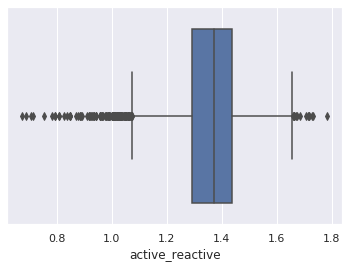

In [20]:
#distribution of active to reactive relation
sns.boxplot(electrods_new['active_reactive'])
plt.show()

In [21]:
#statistics of active to reactive relation
electrods_new['active_reactive'].describe()

count    3214.000000
mean        1.357452
std         0.132824
min         0.676106
25%         1.292892
50%         1.370550
75%         1.438292
max         1.782164
Name: active_reactive, dtype: float64

<h2><a id="step_2" style="color: black; text-decoration: none;">Final datasets</a></h2>

<h3><a id="substep_7" style="color: black; text-decoration: none;">Build tables</a></h3>

We need to merge tables by `key`:
- `electrods_new`
- `temperature_new`
- `gas`
- `wire_volume`
- `bulk_volume`

In [22]:
#merge tables
result = pd.merge(electrods_new, temperature_new, on = "key")
result = pd.merge(result, gas, on = "key")
result = pd.merge(result, wire_volume, on = "key")
result = pd.merge(result, bulk_volume, on = "key")

result.head(3)

,key,heat_duration,active_reactive,temp_first,temp_last,time_first,time_last,duration,gas,wire_1,...,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,00:18:18,1.538898,1571.0,1613.0,2019-05-03 11:16:18,2019-05-03 11:30:39,00:14:21,29.749986,60.059998,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,00:13:31,1.551834,1581.0,1602.0,2019-05-03 11:37:27,2019-05-03 11:59:12,00:21:45,12.555561,96.052315,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,00:10:55,1.583120,1596.0,1599.0,2019-05-03 12:13:17,2019-05-03 12:34:57,00:21:40,28.554793,91.160157,...,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0


In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 33 columns):
key                2325 non-null int64
heat_duration      2325 non-null timedelta64[ns]
active_reactive    2325 non-null float64
temp_first         2325 non-null float64
temp_last          2325 non-null float64
time_first         2325 non-null datetime64[ns]
time_last          2325 non-null datetime64[ns]
duration           2325 non-null timedelta64[ns]
gas                2325 non-null float64
wire_1             2325 non-null float64
wire_2             2325 non-null float64
wire_3             2325 non-null float64
wire_4             2325 non-null float64
wire_5             2325 non-null float64
wire_6             2325 non-null float64
wire_7             2325 non-null float64
wire_8             2325 non-null float64
wire_9             2325 non-null float64
bulk_1             2325 non-null float64
bulk_2             2325 non-null float64
bulk_3             2325 non-null float64
bulk

No missing values. Drop excessive columns with dates and set duration to seconds

In [24]:
#drop columns, time type
result = result.drop(['time_first', 'time_last'], axis = 1)
result['heat_duration'] = result['heat_duration'].dt.total_seconds()
result['duration'] = result['duration'].dt.total_seconds()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 31 columns):
key                2325 non-null int64
heat_duration      2325 non-null float64
active_reactive    2325 non-null float64
temp_first         2325 non-null float64
temp_last          2325 non-null float64
duration           2325 non-null float64
gas                2325 non-null float64
wire_1             2325 non-null float64
wire_2             2325 non-null float64
wire_3             2325 non-null float64
wire_4             2325 non-null float64
wire_5             2325 non-null float64
wire_6             2325 non-null float64
wire_7             2325 non-null float64
wire_8             2325 non-null float64
wire_9             2325 non-null float64
bulk_1             2325 non-null float64
bulk_2             2325 non-null float64
bulk_3             2325 non-null float64
bulk_4             2325 non-null float64
bulk_5             2325 non-null float64
bulk_6             2325 non-null f

<h3><a id="substep_8" style="color: black; text-decoration: none;">2.2. Extract features and target</a></h3>

In [25]:
#select target & features
target = result.temp_last.copy()
features = result.drop(['temp_last', 'key'], axis = 1).copy()

We need to look at a correlation matrix to find out if there are any signs of multicollinearity

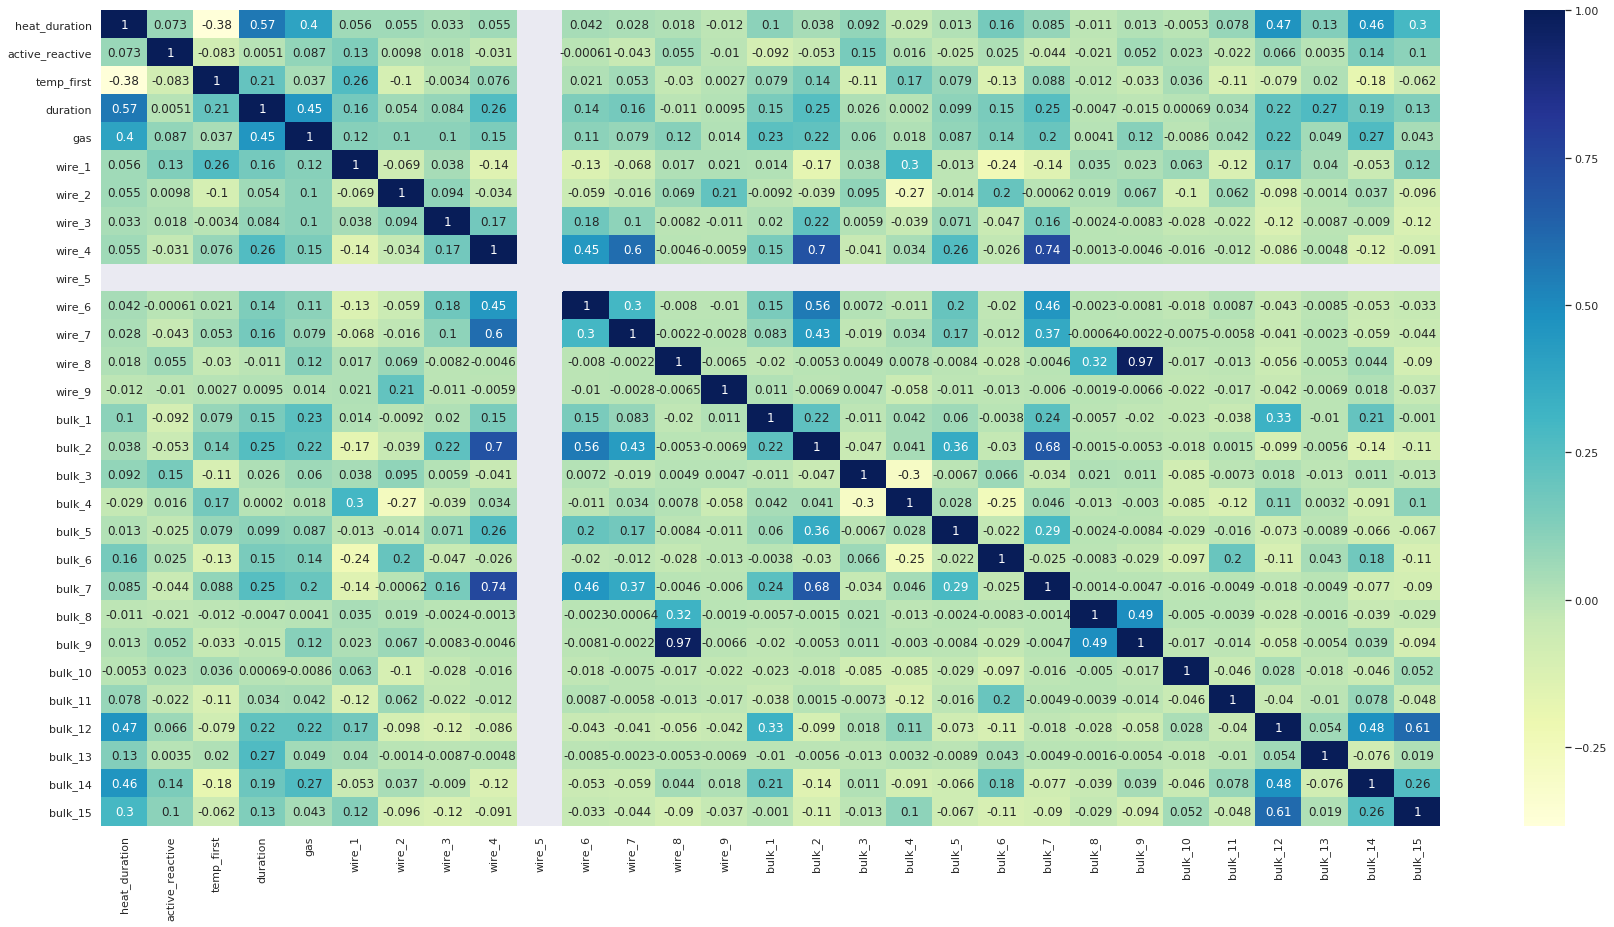

In [26]:
#look at a correlation matrix for features
plt.subplots(figsize=(30,15))
sns.heatmap(features.corr(), annot=True, cmap="YlGnBu")
plt.show()

Look at some features

In `wire_5` there may be all 0 values

High correlation between (>0.7):
- `bulk_9`, `wire_8`
- `bulk_7`, `wire_4`
- `bulk_2`, `wire_4`
- `bulk_7`, `bulk_2`

In [27]:
print(result[result.wire_5 == 0]['wire_5'].count())

print(result[result.bulk_9 == 0]['bulk_9'].count())

print(result[result.wire_8 == 0]['wire_8'].count())

print(result[result.bulk_7 == 0]['bulk_7'].count())

print(result[result.wire_4 == 0]['wire_4'].count())

print(result[result.bulk_2 == 0]['bulk_2'].count())

2325
2312
2312
2312
2313
2312


Drop wire_5, wire_4, bulk_9 and bulk_2

In [28]:
#drop features
features = features.drop(['wire_5', 'wire_4', 'bulk_9', 'bulk_2'], axis = 1).copy()

<h3><a id="substep_9" style="color: black; text-decoration: none;">2.3. Split dataset to train and test</a></h3>

Split dataset to train and test as 75%:25%

In [29]:
#train & test datasets
target_train, target_test, features_train, features_test = train_test_split(target, features, \
                                                                            test_size = 0.25,  \
                                                                            random_state = 12345)

print('Size of train - target:', target_train.shape)
print('Size of train - features:', features_train.shape)
print('Size of test - target:', target_test.shape)
print('Size of test - features:', features_test.shape)

Size of train - target: (1743,)
Size of train - features: (1743, 25)
Size of test - target: (582,)
Size of test - features: (582, 25)


<h2><a id="step_3" style="color: black; text-decoration: none;">3. Modelling</a></h2>

Cross-validate 3 models:
- linear regression
- descision tree
- random forest

We use MAE as a quality metric

<h3><a id="substep_10" style="color: black; text-decoration: none;">3.1. Linear regression</a></h3>

In [30]:
#cross-validation for linear regression
function = make_scorer(mean_absolute_error)


linear_scores = cross_val_score(LinearRegression(), features_train, \
                                      target_train, cv = 5, scoring = function)
linear_score = linear_scores.mean()

print('MAE - cross-validation on linear regression:', linear_score)

MAE - cross-validation on linear regression: 5.795512535576695


<h3><a id="substep_11" style="color: black; text-decoration: none;">3.2. Decision tree</a></h3>

In [31]:
#select hyperparameters & cross-validate for tree
tree_score = 100
optimal_depth = 0
for depth in range(1,15):
    tree_scores = cross_val_score(DecisionTreeRegressor(random_state = 12345, \
                                                               max_depth = depth), \
                                      features_train, target_train, cv = 5, scoring = function)
    score = tree_scores.mean()
    if score < tree_score:
        tree_score = score
        optimal_depth = depth
        
print('Max depth:', optimal_depth)
print('MAE - cross-validation on decision tree:',  tree_score)

Max depth: 6
MAE - cross-validation on decision tree: 6.887492024861402


<h3><a id="substep_12" style="color: black; text-decoration: none;">3.3. Random forest</a></h3>

In [32]:
#select hyperparameters & cross-validate for random forest
forest_score = 100
optimal_depth_forest = 0
for depth in range(1,20):
    forest_scores = cross_val_score(RandomForestRegressor(random_state = 12345,  max_depth = depth, \
                                                          n_estimators = 20), \
                                      features_train, target_train, cv = 5, scoring = function)
    score = forest_scores.mean()
    if score < forest_score:
        forest_score = score
        optimal_depth_forest = depth
        
forest_score = 100
optimal_estimators = 0
for estimator in range(1,21):
    forest_scores = cross_val_score(RandomForestRegressor(random_state = 12345, \
                                                          max_depth = optimal_depth_forest, \
                                                          n_estimators = estimator), \
                                      features_train, target_train, cv = 5, scoring = function)
    score = forest_scores.mean()
    if score < forest_score:
        forest_score = score
        optimal_estimators = estimator
        
print('Max depth:', optimal_depth_forest)        
print('Number of estimators:', optimal_estimators)
print('MAE - cross-validation on random forest:',  forest_score)

Max depth: 10
Number of estimators: 18
MAE - cross-validation on random forest: 6.058416021393895


Estimate impact of features on target

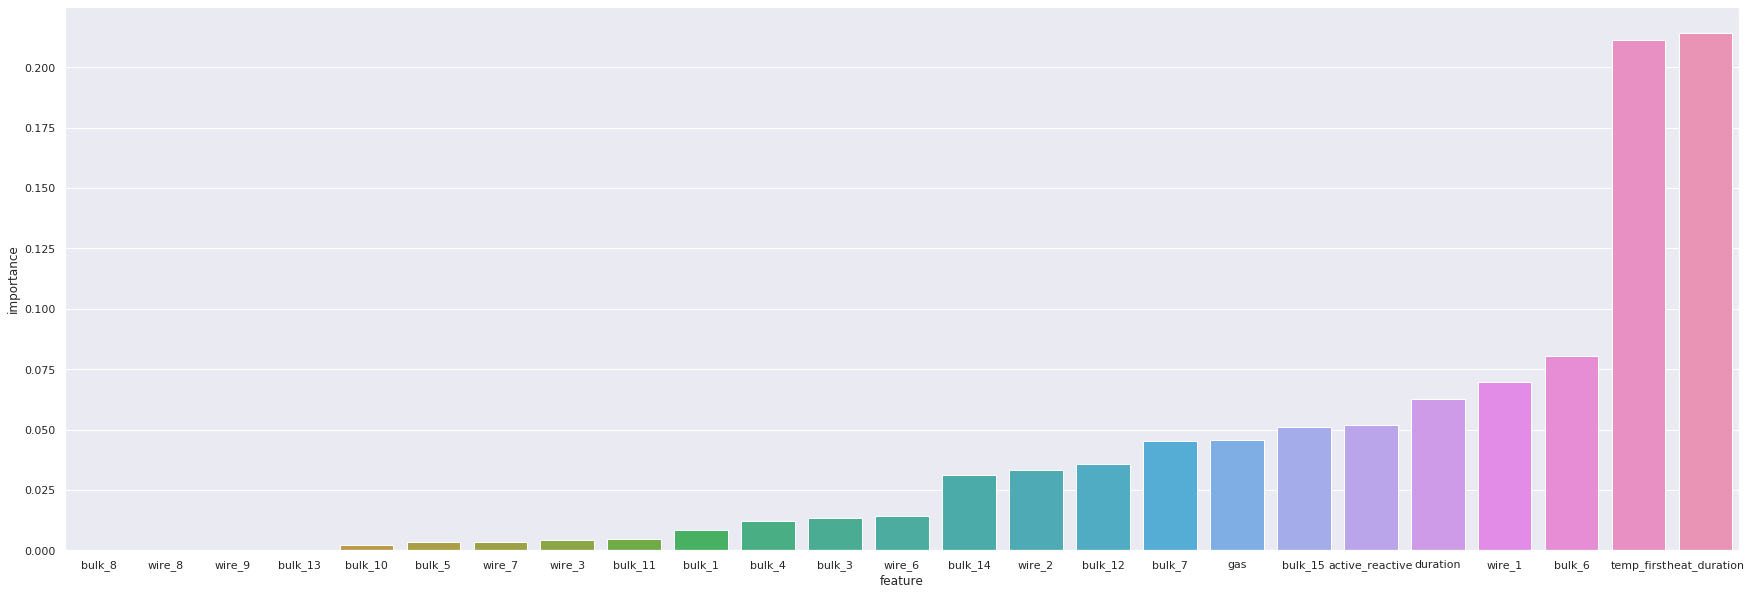

In [33]:
#estimate feature importance
forest = RandomForestRegressor(random_state = 12345, max_depth = optimal_depth_forest, \
                               n_estimators = optimal_estimators)
forest.fit(features_train, target_train)

feat_importance = pd.DataFrame(data = {'feature': features.columns, 'importance': forest.feature_importances_})
feat_importance = feat_importance.sort_values(by = ['importance'])

plt.subplots(figsize = (30,10))
sns.barplot(x = 'feature', y = 'importance', data = feat_importance)
plt.show()

We can drop 4 features which are almost irrelevant - `bulk_8`, `wire_8`, `wire_9` and `bulk_13`

In [34]:
#drop the least important features
features_train = features_train.drop(['bulk_8', 'wire_8', 'wire_9', 'bulk_13'], \
                                     axis = 1).copy()
features_test = features_test.drop(['bulk_8', 'wire_8', 'wire_9', 'bulk_13'], \
                                     axis = 1).copy()

Cross-validate after dropping those features

In [35]:
#cross-validation for linear regression
linear_scores = cross_val_score(LinearRegression(), features_train, \
                                      target_train, cv = 5, scoring = function)
linear_score = linear_scores.mean()

print('MAE - cross-validation on linear regression:', linear_score)

MAE - cross-validation on linear regression: 5.789236983846289


In [36]:
#select hyperparameters & cross-validate for random forest
forest_score = 100
optimal_depth_forest = 0
for depth in range(1,20):
    forest_scores = cross_val_score(RandomForestRegressor(random_state = 12345,  max_depth = depth, \
                                                          n_estimators = 20), \
                                      features_train, target_train, cv = 5, scoring = function)
    score = forest_scores.mean()
    if score < forest_score:
        forest_score = score
        optimal_depth_forest = depth
        
forest_score = 100
optimal_estimators = 0
for estimator in range(1,21):
    forest_scores = cross_val_score(RandomForestRegressor(random_state = 12345, \
                                                          max_depth = optimal_depth_forest, \
                                                          n_estimators = estimator), \
                                      features_train, target_train, cv = 5, scoring = function)
    score = forest_scores.mean()
    if score < forest_score:
        forest_score = score
        optimal_estimators = estimator
        
print('Max depth:', optimal_depth_forest)        
print('Number of estimators:', optimal_estimators)
print('MAE - cross-validation on random forest:',  forest_score)

Max depth: 9
Number of estimators: 19
MAE - cross-validation on random forest: 6.06362819133582


<h3><a id="substep_13" style="color: black; text-decoration: none;">3.4. Model testing</a></h3>

Linear regression demonstrated the lowest MAE. Check quality of best models on test sample

In [37]:
#test linear regression
lin = LinearRegression()
lin.fit(features_train, target_train)
lin_pred = lin.predict(features_test)
print('MAE of linear regression - test:', mean_absolute_error(target_test, lin_pred))

MAE of linear regression - test: 6.159938435977919


<h2><a id="step_4" style="color: black; text-decoration: none;">4. Conclusion</a></h2>

Linear regression demonstrates best quality both on train and test datasets. MAE is 6.16'